# Assignment 3
**Author**: Lauren Enriquez

---

### 2. **Poisson Counts** 

**a)** Find expressions for the Poisson parameters for each of the two hypotheses: λ<sub>0</sub> for H<sub>0</sub> and λ<sub>x</sub>,λ<sub>y</sub> for H<sub>a</sub> <br/>
**(All 10 datapoints)**<br/>
λ<sub>0</sub> = $\frac{1}{10}$ * $\sum_{i=0}^{10} (x_i)$<br/><br/>
**(Condition 1)**<br/>
λ<sub>x</sub> = $\frac{1}{5}$ * $\sum_{i=0}^{5} (x_i)$<br/><br/>
**(Condition 2)**<br/>
λ<sub>y</sub> = $\frac{1}{5}$ * $\sum_{i=5}^{5} (x_i)$<br/>

---

In [1]:
import pandas as pd
import numpy as np
import math
from math import log as log
from scipy.stats import poisson
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit 

**b)** Compute the lambdas by implementing your answer from Q2.a using the provided dataset. 

In [2]:
# Imports the information from the tsv file into a pandas dataframe, saved as gene1
gene1 = pd.DataFrame(pd.read_table('q2_set_1.tsv',delim_whitespace = True,header=0))

In [3]:
# Creates an array of all the values in the gene1 dataframe
array1 = gene1.iloc[0,:].values

In [4]:
# Calculates the lambdas for the two hypotheses using the expression above

# Calculates lambda for H0
λ0 = (1/10) * np.sum(array1)

# Calculates the lambdas for Ha
λx = (1/5) * array1[:5].sum()
λy = (1/5) * array1[5:].sum()

In [5]:
#Displays the values for the lambdas calculated for each hypothesis
print("λ0: ", λ0, "\n")
print("λx: ", λx, "\n")
print("λy: ", λy,)

λ0:  5889.400000000001 

λx:  5902.6 

λy:  5876.200000000001


---
**c)** Find expressions for L<sub>0</sub> and L<sub>a</sub>, the likelihoods for the two hypotheses. <br/>
L<sub>0</sub> = $\pi_{i=0}^{10} $ P<sub>λ<sub>0</sub></sub>(X = x<sub>i</sub></sub>) = $\pi_{i=0}^{10}$ ($\frac{λ_0^{x_i}e^{-λ_0}}{x_i !}$)

<br/><br/>
x = Condition 1 **|** y = Condition 2

L<sub>a</sub> = $\pi$<sub>i</sub> P<sub>λ<sub>a</sub></sub>(X = x<sub>i</sub></sub>) = $\pi_{i=0}^{10}$ ($\frac{λ_a^{x_i}e^{-λ_a}}{x_i !}$) = $\pi_{i=0}^{5}$ ($\frac{λ_x^{x_i}e^{-λ_x}}{x_i !}$) * $\pi_{i=5}^{5}$ ($\frac{λ_y^{x_i}e^{-λ_y}}{x_i !}$)

<br/><br/>
Coding:<br/>
P<sub>λ</sub>(X = x<sub>i</sub></sub>) = $\frac{λ^{x_i}e^{-λ}}{x_i !}$ = poisson.pmf(x<sub>i</sub></sub> , λ)

---

**e)** Using the likelihood ratio test for a p-value of 0.05 (using a χ2 table for 1 degree of freedom), can you safely reject the null hypothesis?

In [6]:
# Calculates the log likelihood of L0
Pnull = [poisson.pmf(array1[i],λ0) for i in range(len(array1))]
Pnull = np.product(Pnull)
print('log likelihood of L0: ', Pnull)

log likelihood of L0:  2.26552438075688e-24


In [7]:
# Calculates the log likelihood of La

# Calculates the log likelihood of Condition 1
Px = [poisson.pmf(array1[i],λx) for i in range(0,5)]
Px = np.product(Px)

# Calculates the log likelihood of Condition 2
Py = [poisson.pmf(array1[i],λy) for i in range(5,10)]
Py = np.product(Py)

# Calculates the log likelihood for La
Palt = Px * Py
print('log likelihood of La: ', Palt)

log likelihood of La:  2.626712736549337e-24


In [8]:
# Calculates the log likelihood ratio
LR = -2 * log(Pnull/Palt)
print('log likelihood ratio (LR): ',LR)

log likelihood ratio (LR):  0.29585381504148267


0.29585381504148267 is less than 3.841 (the $chi^2$ value with 1 degree of freedom). Therefore, we **do not** reject the null hypothesis.

---

### 3. **Comparing Distributions** 

In [9]:
# Imports the information from the tsv files into two pandas dataframes, saved as data_set and data_set2
data_set = pd.DataFrame(pd.read_table('q3_set_1.tsv',delim_whitespace = True,header=0))
data_set2 = pd.DataFrame(pd.read_table('q3_set_2.tsv',delim_whitespace = True,header=0))

In [10]:
# Creates an 2D array of all the values each of the datasets (1 and 2) 
data_set1 = data_set.iloc[:,:].values
data_set2 = data_set2.iloc[:,:].values

**a)** Finds mean and variance for each gene, under each condition, for both sets.

In [11]:
# Creates an array of each Mean and Variance, for each gene, under each condition in Data Set 1
mean1a= [(data_set1[i][:5].mean()) for i in range(len(data_set1))]
mean1b = [(data_set1[i][5:].mean()) for i in range(len(data_set1))]
var1a = [(data_set1[i][:5].var()) for i in range(len(data_set1))]
var1b = [(data_set1[i][5:].var()) for i in range(len(data_set1))]

# Creates an array of each Mean and Variance, for each gene, under each condition in Data Set 2
mean2a= [(data_set2[i][:5].mean()) for i in range(len(data_set2))]
mean2b = [(data_set2[i][5:].mean()) for i in range(len(data_set2))]
var2a = [(data_set2[i][:5].var()) for i in range(len(data_set2))]
var2b = [(data_set2[i][5:].var()) for i in range(len(data_set2))]

---
**b)** Create two separate plots for the 2 datasets, plotting the previously found means against variances. Determine which distribution is the basis for each (just based on visual interpretation).

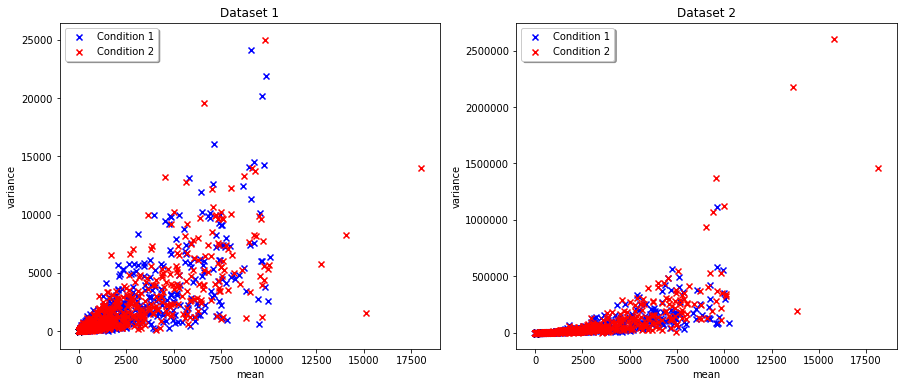

In [12]:
# Creates a figure with two subplots of the previously found means vs variances for each data set
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# Dataset 1
ax1.set_title('Dataset 1')
ax1.scatter(mean1a,var1a, c = 'blue', marker = 'x', linewidths = 0.5)
ax1.scatter(mean1b,var1b, c = 'red', marker = 'x', linewidths = 0.5)
ax1.set_ylabel('variance')
ax1.set_xlabel('mean')
ax1.legend(('Condition 1', 'Condition 2'), loc='upper left', shadow=True)

# Dataset 2
ax2.set_title('Dataset 2')
ax2.scatter(mean2a,var2a, c = 'blue', marker = 'x', linewidths = 0.5)
ax2.scatter(mean2b,var2b, c = 'red', marker = 'x', linewidths = 0.5)
ax2.set_ylabel('variance')
ax2.set_xlabel('mean')
ax2.legend(('Condition 1', 'Condition 2'), loc='upper left', shadow=True)
plt.show()

Visually, Dataset 1 appears to have a **Poisson distribution**. Dataset 2 appears to have **negative binomial (Pascal) distribution**. 

---

**c)** Analysis of Individual Genes As stated before, each dataset contains counts for genes expressed in two conditions. Many genes will be expressed similarly across both conditions, though not all.


**i.** For each gene (and for both datasets), determine if there is a statistical difference in expression counts across the two conditions using the likelihood ratio test as in Q2, assuming a Poisson distribution for both.

In [13]:
# Function that conducts the Log likelihood test
    #INPUT: an 2D array of count values
def LR_test(data, ep = 1e-150):
    
    # Calculates the lambdas for the two hypotheses in the dataset
        # Calculates lambda for H0
    λ = [((1/10) * np.sum(data[i])) for i in range(len(data))]
    
        # Calculates the lambdas for Ha
    λa = [((1/5) * data[i][:5].sum()) for i in range(len(data))]
    λb = [((1/5) * data[i][5:].sum()) for i in range(len(data))]
    
    
    # Calculates the log likelihood of L0 (null hypothesis) for each gene in the dataset
    Pnull = [np.prod(poisson.pmf((data[i]),λ[i])) for i in range(len(data)) ]
     
    # Calculates the log likelihood of La (alternative hypothesis) for each gene in the dataset
        # Calculates the log likelihood of Condition 1
    Pa = [np.prod(poisson.pmf((data[i][:5]),λa[i])) for i in range(len(data))]
    
        # Calculates the log likelihood of Condition 2
    Pb = [np.prod(poisson.pmf((data[i][5:]),λb[i])) for i in range(len(data))]
    
        # Calculates the log likelihood of La for each gene
    Palt = [(Pa[i] * Pb[i]) for i in range(len(data))]
    
    # Calculates the log likelihood ratio for each gene in the dataset
    LR = [(-2 * log((Pnull[i] + ep) / (Palt[i] + ep))) for i in range(len(data))]
    
    # Determines if one can safely reject the null hypothesis given 1 degree of freedom (x^2) = 3.841 
    reject_null = []
    SD = []
    for i in range(len(data)):
        if LR[i] > 3.841:
            reject_null.append('Yes')
            SD.append('Yes')
        else:
            reject_null.append('No')
            SD.append('No')
    
    # Creates a dataframe of the results for each gene
    output = {'Log Likelihood': LR, '      Reject Null?': reject_null, '       Statistical difference?':SD}
    rows = ['gene' + str(x+1) for x in range(0,1000)]
    table = pd.DataFrame(data=output)
    table.index = rows
    
    return table
    

In [14]:
# Determines if there is a statistical difference in expression counts across the two conditions for each gene
#Dataset 1
LR_1 = LR_test(data_set1)
print(LR_1)

          Log Likelihood       Reject Null?        Statistical difference?
gene1           0.295854                 No                             No
gene2           1.553045                 No                             No
gene3         584.689818                Yes                            Yes
gene4           0.013741                 No                             No
gene5           0.218731                 No                             No
...                  ...                ...                            ...
gene996       581.397316                Yes                            Yes
gene997         0.154034                 No                             No
gene998         2.383899                 No                             No
gene999         3.446195                 No                             No
gene1000        2.268476                 No                             No

[1000 rows x 3 columns]


In [15]:
# Determines if there is a statistical difference in expression counts across the two conditions for each gene
#Dataset 2
LR_2 = LR_test(data_set2)
print(LR_2)

          Log Likelihood       Reject Null?        Statistical difference?
gene1          95.084609                Yes                            Yes
gene2           2.600694                 No                             No
gene3         494.056755                Yes                            Yes
gene4           0.242441                 No                             No
gene5           2.786425                 No                             No
...                  ...                ...                            ...
gene996       512.812789                Yes                            Yes
gene997         2.036084                 No                             No
gene998         9.073395                Yes                            Yes
gene999         0.389229                 No                             No
gene1000        0.791568                 No                             No

[1000 rows x 3 columns]


---
**ii.** Compare between datasets the number of significant differences in gene expression across the two conditions i.e. number of genes expressed differently in dataset 1 vs. dataset 2. Using this comparison, determine the underlying distribution for each dataset. Briefly explain why (<10 words).

In [16]:
# Determines the total number of significant differences in gene expression for Dataset 1
print('Dataset 1 : Total number of significant differences in gene expression')
print(LR_1['       Statistical difference?'].value_counts())

Dataset 1 : Total number of significant differences in gene expression
No     861
Yes    139
Name:        Statistical difference?, dtype: int64


In [17]:
# Determines the total number of significant differences in gene expression for Dataset 2
print('Dataset 2 : Total number of significant differences in gene expression')
print(LR_2['       Statistical difference?'].value_counts())

Dataset 2 : Total number of significant differences in gene expression
No     632
Yes    368
Name:        Statistical difference?, dtype: int64


In **Dataset 1**, there were **139 genes** that were significantly different.<br> In **Dataset 2**, there were **368 genes** that were significantly different. <br><br>
**Dataset 1** has a **Poisson Distribution**.<br>**Dataset 2** has a **negative binomial (Pascal) distribution**.<br><br>Poisson model is compatible with Dataset 1 because 86.1% of the genes have accepted the null hypothesis.